In [1]:
import random
import cv2
import ipywidgets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skimage.morphology
import skimage.color
import skimage.util
from scipy import ndimage
import matplotlib.pyplot as plt
from skimage import measure

In [2]:
sns.set(style='dark')
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['image.cmap'] = 'viridis'
np.set_printoptions(threshold=20, edgeitems=10, linewidth=140, precision=3, suppress=True)

In [3]:
rgb = skimage.io.imread('data/rice.bmp')
gray = skimage.color.rgb2gray(rgb)

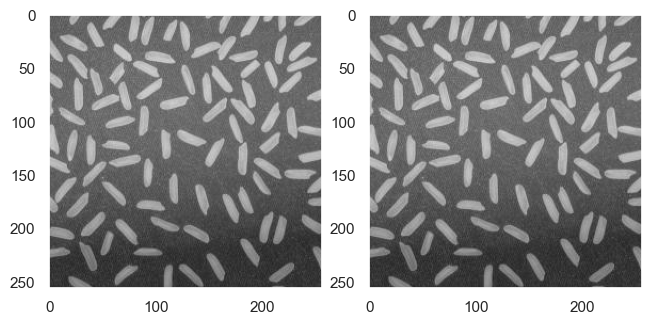

In [4]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(rgb)
axes[1].imshow(gray, cmap='gray', vmin=0, vmax=1);

# Task 1: use top-hat grayscale morphology to remove the non-uniform background of the rice image and threshold using an appropriate value

Morphological top-hat operation is `tophat(image) = image - grayscale_open(image, structuring_elem)`.

In order to get the necessary information about objects, you can use whatever functions, e.g.
- `skimage.measure.regionprops`
- or OpenCV's functions `connectedComponentsWithStats` and `findContours` as shown below.

In [5]:
# TODO: implement
structuring_elem = skimage.morphology.disk(10)
tophat = gray - ndimage.grey_opening(gray, structure=structuring_elem)
threshold_value = 0.2
binary_image = tophat > threshold_value

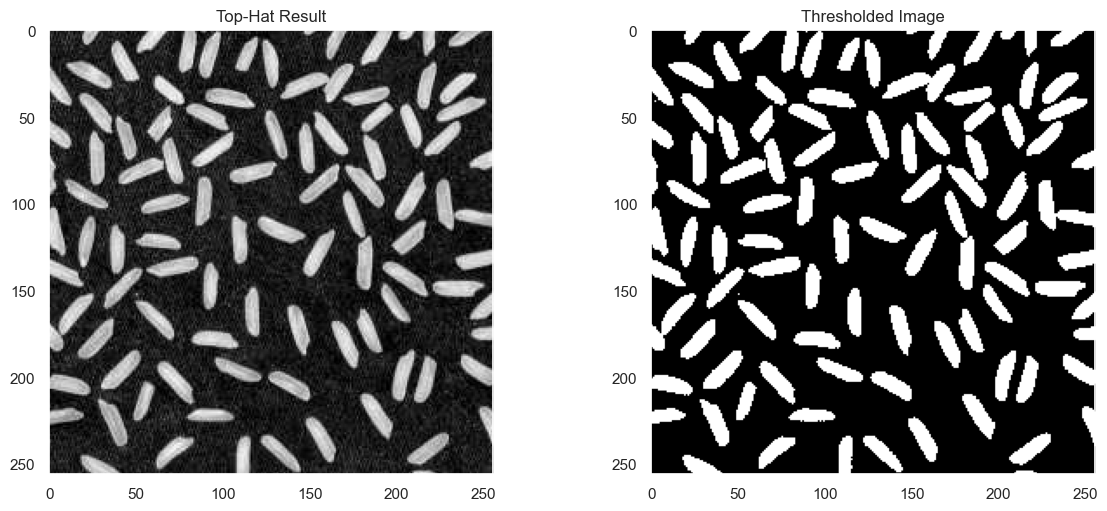

In [6]:
# image after top-hat (left) and thresholding (right)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(tophat, cmap='gray')
axes[0].set_title('Top-Hat Result')

axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title('Thresholded Image')

plt.show()

# Task 2: count how many grains there are and calculate their average length and width (thickness)

In [7]:
# TODO: implement
label_image = measure.label(binary_image)
regions = measure.regionprops(label_image)
image_with_rectangles = np.copy(rgb)
line_thickness = 1  

for region in regions:
    min_row, min_col, max_row, max_col = region.bbox
    cv2.rectangle(image_with_rectangles, (min_col, min_row), (max_col, max_row), (255, 0, 0), line_thickness)  # Draw a red rectangle



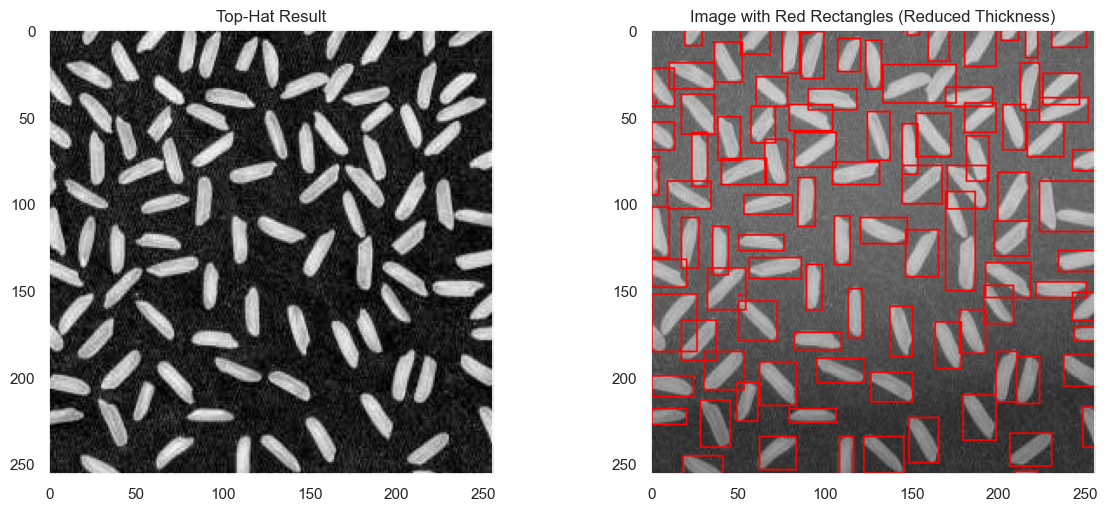

Number of grains: 100


In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(tophat, cmap='gray')
axes[0].set_title('Top-Hat Result')
axes[1].imshow(image_with_rectangles)
axes[1].set_title('Image with Red Rectangles (Reduced Thickness)')
plt.show()

label_image = measure.label(binary_image)
regions = measure.regionprops(label_image)
grain_count = 0
for region in regions:
    grain_count += 1

print(f"Number of grains: {grain_count}")

In [9]:
# average length should be close this number
num_grains = len(regions)
total_length = 0
for region in regions:
    total_length += region.major_axis_length

average_length = total_length / num_grains
print(f"Average Length of grains: {average_length:.2f} pixels")

Average Length of grains: 26.35 pixels


In [10]:
# average width should be close this number
total_width = 0
for region in regions:
    total_width += region.minor_axis_length

average_width = total_width / num_grains
print(f"Average Width (Thickness) of grains: {average_width:.2f} pixels")

Average Width (Thickness) of grains: 8.49 pixels
